In [91]:
pip install -r ./input/code/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import os

# train_ratings.csv
- 가장 기본이 되는 train 파일
- user, item, time
- 전체 데이터 개수 5,154,471
- unique user 31,360명
- unique item 6,807개
- 리뷰 기록 2005-04-11 ~ 2015-03-31

In [2]:
data_path = './input/data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [4]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of rows and columns: ", train_df.shape)
print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of rows and columns:  (5154471, 3)
Number of unique train users:  31360
Number of unique train items:  6807


In [5]:
import time
train_df['time_convert'] = [time.strftime('%Y-%m-%d', time.localtime(x)) for x in train_df['time']]
train_df['time_year'] = [time.strftime('%Y', time.localtime(x)) for x in train_df['time']]
first_record = time.strftime('%Y-%m-%d', time.localtime(min(train_df['time'])))
last_record = time.strftime('%Y-%m-%d', time.localtime(max(train_df['time'])))

print ("Date of the first record", first_record)
print ("Date of the last record", last_record)

Date of the first record 2005-04-11
Date of the last record 2015-03-31


<BarContainer object of 11 artists>

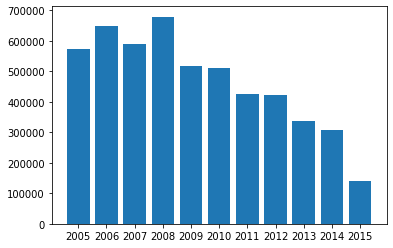

In [6]:
import matplotlib.pyplot as plt
year_review = train_df.groupby("time_year").count()["user"]

fig = plt.figure()
plt.bar(pd.DataFrame(year_review).index, year_review)

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: item, dtype: float64


<AxesSubplot:>

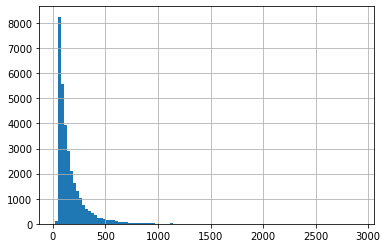

In [7]:
user_item = train_df.groupby("user").count()["item"]
print (user_item.describe())
user_item.hist(bins = 100)

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
Name: user, dtype: float64


<AxesSubplot:>

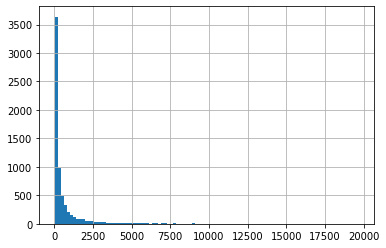

In [8]:
item_user = train_df.groupby("item").count()["user"]
print (item_user.describe())
item_user.hist(bins = 100)

<BarContainer object of 11 artists>

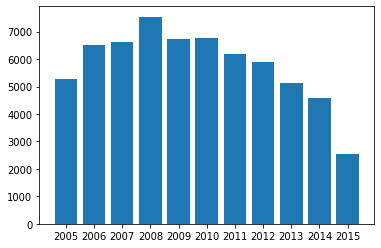

In [9]:
import matplotlib.pyplot as plt
year_user = train_df.groupby('time_year')['user'].nunique()

fig = plt.figure()
plt.bar(pd.DataFrame(year_user).index, year_user)

<BarContainer object of 11 artists>

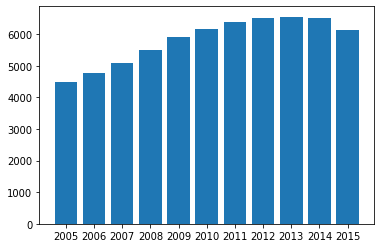

In [10]:
year_item = train_df.groupby('time_year')['item'].nunique()

fig = plt.figure()
plt.bar(pd.DataFrame(year_item).index, year_item)

# side information
- year
- writer
- title
- genre
- director

In [11]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [12]:
display(train_df.head())
train_df.shape

,user,item,time,time_convert,time_year
0,11,4643,1230782529,2009-01-01,2009
1,11,170,1230782534,2009-01-01,2009
2,11,531,1230782539,2009-01-01,2009
3,11,616,1230782542,2009-01-01,2009
4,11,2140,1230782563,2009-01-01,2009


(5154471, 5)

oldest movie 1922
latest movie 2014


<BarContainer object of 93 artists>

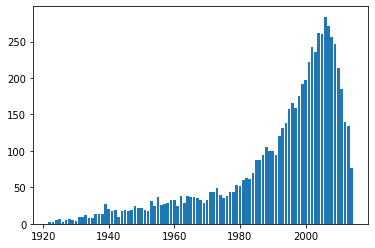

In [13]:
released_year_item = year_data.groupby("year").count()["item"]
print("oldest movie", min(year_data["year"]))
print("latest movie", max(year_data["year"]))
fig = plt.figure()
plt.bar(pd.DataFrame(released_year_item).index, released_year_item)

Number of unique directors 1340


count    1340.000000
mean        4.406716
std         3.633030
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        44.000000
Name: item, dtype: float64

<AxesSubplot:>

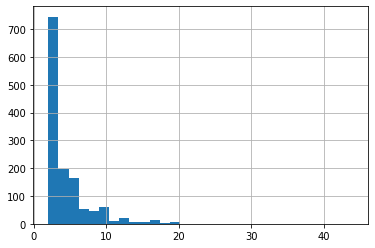

In [14]:
director_item = director_data.groupby("director").count()["item"]
print("Number of unique directors", len(director_data["director"].unique()))
display(director_item.describe())
director_item.hist(bins = 30)

Number of unique writers 2989


count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: item, dtype: float64

<AxesSubplot:>

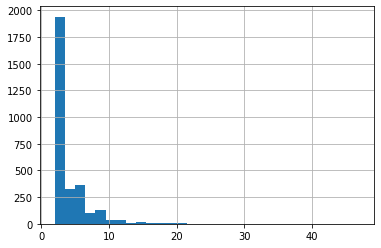

In [15]:
writer_item = writer_data.groupby("writer").count()["item"]
print("Number of unique writers", len(writer_data["writer"].unique()))
display(writer_item.describe())
writer_item.hist(bins = 30)

In [16]:
title_data.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


Number of unique genres 18


<BarContainer object of 18 artists>

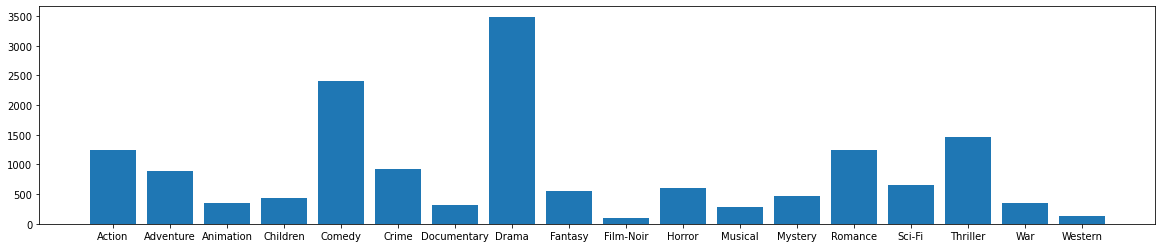

In [17]:
genre_item = genre_data.groupby('genre')['item'].nunique()
print("Number of unique genres", len(genre_data["genre"].unique()))

fig = plt.figure(figsize = (20,4))
plt.bar(pd.DataFrame(genre_item).index, genre_item)

In [18]:
print(train_df.shape)
merge_df = train_df.merge(year_data, how = "left")
print(merge_df.shape)
item_director = pd.DataFrame(director_data.groupby("item")["director"].unique()).reset_index()
merge_df = merge_df.merge(item_director, how = "left")
print(merge_df.shape)
item_writer = pd.DataFrame(writer_data.groupby("item")["writer"].unique()).reset_index()
merge_df = merge_df.merge(item_writer, how = "left")
print(merge_df.shape)
merge_df = title_data.merge(merge_df, how = "left")
print(merge_df.shape)
item_genre = pd.DataFrame(genre_data.groupby("item")["genre"].unique()).reset_index()
merge_df = merge_df.merge(item_genre, how = "left")
print(merge_df.shape)

(5154471, 5)
(5154471, 6)
(5154471, 7)
(5154471, 8)
(5154471, 9)
(5154471, 10)


In [19]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154471 entries, 0 to 5154470
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   item          int64  
 1   title         object 
 2   user          int64  
 3   time          int64  
 4   time_convert  object 
 5   time_year     object 
 6   year          float64
 7   director      object 
 8   writer        object 
 9   genre         object 
dtypes: float64(1), int64(3), object(6)
memory usage: 432.6+ MB


In [20]:
merge_df.isna().sum(axis=0)

item                 0
title                0
user                 0
time                 0
time_convert         0
time_year            0
year              1832
director        301445
writer          312692
genre                0
dtype: int64

In [21]:
import re
# display(merge_df[merge_df["year"].isna()])
# print(merge_df[merge_df["year"].isna()].index)

for i in merge_df[merge_df["year"].isna()].index:
    temp = merge_df.loc[i]
    temp_year = re.findall(r'\(\d\d\d\d\)', temp["title"])[-1][1:-1]
    temp["year"] = temp_year
    merge_df.loc[i] = temp


/tmp/ipykernel_19714/3324503441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["year"] = temp_year


In [22]:
merge_df.head()

,item,title,user,time,time_convert,time_year,year,director,writer,genre
0,318,"Shawshank Redemption, The (1994)",11,1230850571,2009-01-01,2009,1994.0,[nm0001104],"[nm0000175, nm0001104]","[Crime, Drama]"
1,318,"Shawshank Redemption, The (1994)",18,1195573672,2007-11-20,2007,1994.0,[nm0001104],"[nm0000175, nm0001104]","[Crime, Drama]"
2,318,"Shawshank Redemption, The (1994)",25,1277963325,2010-07-01,2010,1994.0,[nm0001104],"[nm0000175, nm0001104]","[Crime, Drama]"
3,318,"Shawshank Redemption, The (1994)",35,1164499180,2006-11-25,2006,1994.0,[nm0001104],"[nm0000175, nm0001104]","[Crime, Drama]"
4,318,"Shawshank Redemption, The (1994)",43,1231446101,2009-01-08,2009,1994.0,[nm0001104],"[nm0000175, nm0001104]","[Crime, Drama]"


In [40]:
new_year = merge_df[["item", "year"]].drop_duplicates()
new_year.to_csv("/opt/ml/input/data/train/new_years.csv", index=False)

In [41]:
years_df = pd.read_csv("/opt/ml/input/data/train/new_years.csv")
def year2era(year):
    if year <= 1970:
        return "~70s"
    if year <= 1990:
        return "70s~90s"
    if year <= 2000:
        return "90s~00s"
    return "00~15s"

years_df.year = years_df["year"].apply(year2era)
years_df

,item,year
0,318,90s~00s
1,2571,90s~00s
2,2959,90s~00s
3,296,90s~00s
4,356,90s~00s
...,...,...
6802,73106,00~15s
6803,109850,00~15s
6804,8605,00~15s
6805,3689,70s~90s


In [113]:
merge_df.isna().sum(axis=0)

item                 0
title                0
user                 0
time                 0
time_convert         0
time_year            0
year                 0
director        301445
writer          312692
genre                0
dtype: int64

In [114]:
print(merge_df[merge_df["director"].isna()].shape)
print(merge_df[merge_df["writer"].isna()].shape)
print(merge_df[(merge_df["director"].isna()) & merge_df["writer"].isna()].shape)

(301445, 10)
(312692, 10)
(118851, 10)


# user11 example

In [115]:
pd.set_option('display.max_rows', None)
user11 = merge_df[merge_df["user"] == 11].sort_values(["user", "time"])
user11.shape

(376, 10)

In [116]:
len(user11["title"].unique())
seen = set()
dupes = [x for x in user11["title"] if x in seen or seen.add(x)]
dupes

['War of the Worlds (2005)']

In [117]:
print("Date when the review was writter", user11["time_convert"].unique())
user11.groupby("time_convert").count()["item"]

Date when the review was writter ['2009-01-01' '2009-01-02' '2009-08-24' '2009-08-25' '2011-01-12']


time_convert
2009-01-01    248
2009-01-02     66
2009-08-24     13
2009-08-25     36
2011-01-12     13
Name: item, dtype: int64

In [118]:
from collections import Counter
user11_director = []
for d in user11["director"]:
    if d is not None and d is not np.NaN:
        user11_director.extend(d)
print("Number of unique directors", len(set(user11_director)))
Counter(user11_director).most_common()

Number of unique directors 257


[('nm0000229', 10),
 ('nm0000318', 6),
 ('nm0000386', 6),
 ('nm0000709', 6),
 ('nm0000116', 5),
 ('nm0001392', 5),
 ('nm0001756', 4),
 ('nm0000165', 4),
 ('nm0000881', 4),
 ('nm0594503', 4),
 ('nm0000184', 4),
 ('nm0796117', 4),
 ('nm0000682', 4),
 ('nm0001060', 4),
 ('nm0001675', 3),
 ('nm0378893', 3),
 ('nm0000416', 3),
 ('nm0000631', 3),
 ('nm0000399', 3),
 ('nm0905152', 3),
 ('nm0905154', 3),
 ('nm0004056', 3),
 ('nm0718645', 3),
 ('nm0000600', 3),
 ('nm0001639', 3),
 ('nm0000233', 3),
 ('nm0001532', 3),
 ('nm0005124', 3),
 ('nm0893659', 3),
 ('nm0190859', 3),
 ('nm0634240', 3),
 ('nm0000343', 2),
 ('nm0000965', 2),
 ('nm0811583', 2),
 ('nm0027271', 2),
 ('nm0919363', 2),
 ('nm0919369', 2),
 ('nm0006625', 2),
 ('nm0960028', 2),
 ('nm0314671', 2),
 ('nm0414144', 2),
 ('nm0455741', 2),
 ('nm0327944', 2),
 ('nm0000154', 2),
 ('nm0000108', 2),
 ('nm0873779', 2),
 ('nm0936374', 2),
 ('nm0000217', 2),
 ('nm0000264', 2),
 ('nm0019282', 2),
 ('nm0035899', 2),
 ('nm0730860', 2),
 ('nm000146

In [119]:
user11_writer = []
for d in user11["writer"]:
    if d is not None and d is not np.NaN:
        user11_writer.extend(d)
print("Number of unique writers", len(set(user11_writer)))
Counter(user11_writer).most_common()

Number of unique writers 577


[('nm0639321', 9),
 ('nm0000184', 8),
 ('nm0744429', 8),
 ('nm0795953', 7),
 ('nm0001140', 7),
 ('nm0254645', 7),
 ('nm0498278', 7),
 ('nm0462895', 6),
 ('nm0000386', 5),
 ('nm0000175', 5),
 ('nm0000116', 5),
 ('nm0905152', 5),
 ('nm0905154', 5),
 ('nm0001392', 5),
 ('nm0004056', 5),
 ('nm0000341', 5),
 ('nm0326040', 5),
 ('nm0003031', 4),
 ('nm0534681', 4),
 ('nm0934093', 4),
 ('nm0859029', 4),
 ('nm0859049', 4),
 ('nm0378144', 4),
 ('nm0923736', 4),
 ('nm0517589', 4),
 ('nm0000709', 4),
 ('nm0594503', 4),
 ('nm0001410', 4),
 ('nm0796117', 4),
 ('nm0920229', 4),
 ('nm0878638', 4),
 ('nm0672015', 4),
 ('nm0456158', 4),
 ('nm0004170', 4),
 ('nm0101991', 4),
 ('nm0909638', 4),
 ('nm0746830', 4),
 ('nm0710020', 4),
 ('nm0761498', 4),
 ('nm0115310', 3),
 ('nm0001279', 3),
 ('nm0083348', 3),
 ('nm0000455', 3),
 ('nm0335469', 3),
 ('nm0794385', 3),
 ('nm0000108', 3),
 ('nm0721675', 3),
 ('nm0301826', 3),
 ('nm0230032', 3),
 ('nm0002041', 3),
 ('nm0748022', 3),
 ('nm0228492', 3),
 ('nm0041864

In [120]:
user11_genre = []
for d in user11["genre"]:
    if d is not None and d is not np.NaN:
        user11_genre.extend(d)
print("Number of unique genres", len(set(user11_genre)))
Counter(user11_genre).most_common()

Number of unique genres 18


[('Sci-Fi', 176),
 ('Action', 167),
 ('Adventure', 133),
 ('Thriller', 130),
 ('Drama', 112),
 ('Comedy', 99),
 ('Fantasy', 67),
 ('Horror', 58),
 ('Children', 53),
 ('Animation', 50),
 ('Romance', 44),
 ('Crime', 33),
 ('Mystery', 25),
 ('War', 12),
 ('Musical', 11),
 ('Documentary', 5),
 ('Film-Noir', 2),
 ('Western', 1)]

In [121]:
user11.sample(5)

,item,title,user,time,time_convert,time_year,year,director,writer,genre
4265385,4366,Atlantis: The Lost Empire (2001),11,1230785667,2009-01-01,2009,2001.0,"[nm0873779, nm0936374]","[nm0007233, nm0614742, nm0721675, nm0873779, n...","[Adventure, Animation, Children, Fantasy]"
2169973,6953,21 Grams (2003),11,1230854046,2009-01-01,2009,2003.0,[nm0327944],[nm0037247],"[Crime, Drama, Mystery, Romance, Thriller]"
2209923,39,Clueless (1995),11,1230859032,2009-01-02,2009,1995.0,[nm0002132],[nm0002132],"[Comedy, Romance]"
4902702,7541,100 Girls (2000),11,1230783053,2009-01-01,2009,2000.0,[nm0205157],[nm0205157],"[Comedy, Romance]"
2018048,6863,School of Rock (2003),11,1230853768,2009-01-01,2009,2003.0,[nm0000500],[nm0925234],"[Comedy, Musical]"


In [122]:
user11_time_genre = {}
for t in user11["time_convert"].unique():
    user11_time = user11[user11["time_convert"] == t]
    temp = []
    for g in user11_time["genre"]:
        if g is not None and g is not np.NaN:
            temp.extend(g)
    user11_time_genre[t] = temp
    print("Number of unique genres in", t, len(set(temp)))
    print(Counter(temp).most_common())
    print()

Number of unique genres in 2009-01-01 18
[('Sci-Fi', 139), ('Action', 112), ('Adventure', 91), ('Thriller', 91), ('Comedy', 65), ('Drama', 57), ('Fantasy', 47), ('Horror', 40), ('Children', 35), ('Animation', 34), ('Romance', 25), ('Mystery', 17), ('Crime', 14), ('Musical', 6), ('War', 3), ('Documentary', 3), ('Film-Noir', 2), ('Western', 1)]

Number of unique genres in 2009-01-02 15
[('Action', 28), ('Drama', 25), ('Comedy', 23), ('Adventure', 23), ('Crime', 15), ('Thriller', 14), ('Romance', 14), ('Fantasy', 13), ('Children', 11), ('Animation', 9), ('Horror', 7), ('War', 5), ('Sci-Fi', 5), ('Musical', 4), ('Mystery', 1)]

Number of unique genres in 2009-08-24 12
[('Action', 7), ('Drama', 6), ('Comedy', 5), ('Adventure', 4), ('Romance', 3), ('Animation', 3), ('Children', 3), ('Fantasy', 3), ('War', 2), ('Horror', 1), ('Mystery', 1), ('Thriller', 1)]

Number of unique genres in 2009-08-25 15
[('Sci-Fi', 31), ('Thriller', 19), ('Action', 16), ('Drama', 14), ('Adventure', 11), ('Horror',

# Is merge_df Sequential data?
- reviewed items vs reviewed date per users

In [123]:
check_sequential = pd.DataFrame(merge_df.groupby('user')["item"].nunique()).reset_index().merge(pd.DataFrame(merge_df.groupby('user')["time_convert"].nunique()).reset_index())
check_sequential["ratio"] = check_sequential["item"] / check_sequential["time_convert"]

In [124]:
check_sequential.sort_values("ratio").head(100)

,user,item,time_convert,ratio
6009,26188,68,66,1.030303
3984,17503,101,97,1.041237
18765,82502,97,93,1.043011
399,1741,152,141,1.078014
12505,54894,130,120,1.083333
4001,17571,362,333,1.087087
886,3797,361,331,1.090634
13997,61394,178,163,1.092025
16142,70940,265,242,1.095041
5790,25180,255,232,1.099138


<AxesSubplot:>

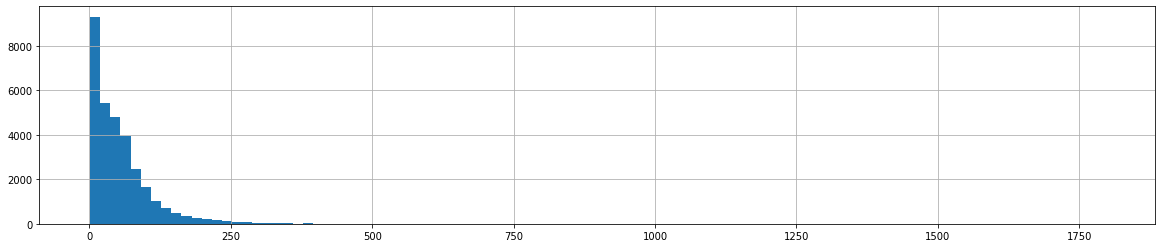

In [125]:
fig = plt.figure(figsize = (20,4))
check_sequential["ratio"].hist(bins=100)

In [126]:
check_sequential["ratio"].describe()

count    31360.000000
mean        54.567812
std         58.426759
min          1.030303
25%         15.034091
50%         41.500000
75%         73.000000
max       1795.000000
Name: ratio, dtype: float64

In [127]:
merge_df[merge_df["user"] == 26188].sort_values("time_convert")

,item,title,user,time,time_convert,time_year,year,director,writer,genre
2643993,4641,Ghost World (2001),26188,1113664835,2005-04-16,2005,2001.0,[nm0959062],[nm0167280],"[Comedy, Drama]"
2372522,7323,"Good bye, Lenin! (2003)",26188,1115708626,2005-05-10,2005,2003.0,NaN,[nm1557910],"[Comedy, Drama]"
3999712,4389,Lost and Delirious (2001),26188,1115799957,2005-05-11,2005,2001.0,NaN,NaN,[Drama]
2246036,34048,War of the Worlds (2005),26188,1120287003,2005-07-02,2005,2005.0,[nm0000229],"[nm0295264, nm0462895, nm0920229]","[Action, Adventure, Sci-Fi, Thriller]"
2222719,2712,Eyes Wide Shut (1999),26188,1122777513,2005-07-31,2005,1999.0,[nm0000040],"[nm0000040, nm0710698]","[Drama, Mystery, Thriller]"
2033087,4014,Chocolat (2000),26188,1122789189,2005-07-31,2005,2000.0,[nm0002120],[nm0414608],"[Drama, Romance]"
3820784,8957,Saw (2004),26188,1124421184,2005-08-19,2005,2004.0,[nm1490123],"[nm1191481, nm1490123]","[Horror, Mystery, Thriller]"
3951164,4054,Save the Last Dance (2001),26188,1128762460,2005-10-08,2005,2001.0,[nm0141961],[nm0012137],"[Drama, Romance]"
3912241,39446,Saw II (2005),26188,1131747917,2005-11-11,2005,2005.0,[nm1135423],[nm1191481],"[Horror, Thriller]"
4544066,3916,Remember the Titans (2000),26188,1132827553,2005-11-24,2005,2000.0,[nm0945026],[nm0397322],[Drama]


# Dimension Reduction of genres

In [128]:
genre_data.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [142]:
item_genre_df = merge_df[["item", "genre"]]
item_genre_df.drop_duplicates(subset = ["item"], inplace = True)
item_genre_df.shape

/tmp/ipykernel_11310/4257757486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_genre_df.drop_duplicates(subset = ["item"], inplace = True)


(6807, 2)

In [160]:
genre_combination = []
for i in item_genre_df.index:
    genre_combination.append(str(list(set(item_genre_df["genre"][i]))))

In [162]:
Counter(genre_combination).most_common()

[("['Drama']", 832),
 ("['Comedy']", 464),
 ("['Comedy', 'Drama']", 308),
 ("['Romance', 'Drama']", 297),
 ("['Comedy', 'Romance']", 246),
 ("['Documentary']", 229),
 ("['Romance', 'Comedy', 'Drama']", 228),
 ("['Thriller', 'Drama']", 132),
 ("['Drama', 'Crime']", 107),
 ("['Drama', 'War']", 100),
 ("['Thriller', 'Drama', 'Crime']", 100),
 ("['Horror']", 82),
 ("['Thriller', 'Horror']", 82),
 ("['Comedy', 'Crime']", 67),
 ("['Sci-Fi', 'Action', 'Adventure']", 60),
 ("['Action', 'Comedy']", 53),
 ("['Action', 'Thriller', 'Drama', 'Crime']", 52),
 ("['Action', 'Thriller', 'Crime']", 52),
 ("['Thriller']", 46),
 ("['Comedy', 'Children']", 46),
 ("['Action', 'Drama', 'War']", 45),
 ("['Adventure', 'Drama']", 43),
 ("['Action', 'Thriller']", 43),
 ("['Sci-Fi', 'Action', 'Thriller']", 40),
 ("['Thriller', 'Drama', 'Mystery']", 39),
 ("['Action', 'Thriller', 'Adventure']", 37),
 ("['Action', 'Drama']", 35),
 ("['Thriller', 'Crime']", 34),
 ("['Thriller', 'Drama', 'Horror']", 34),
 ("['Musical

In [168]:
# https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
from apyori import apriori
records = []
for x in item_genre_df["genre"]:
    records.append(list(x))

In [169]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [171]:
print(len(association_results))
print(association_results[0])

54
RelationRecord(items=frozenset({'Adventure', 'Animation'}), support=0.023652122814749522, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Animation'}), items_add=frozenset({'Adventure'}), confidence=0.4535211267605634, lift=3.4647792478778396)])


In [173]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Adventure -> Animation
Support: 0.023652122814749522
Confidence: 0.4535211267605634
Lift: 3.4647792478778396
Rule: Children -> Adventure
Support: 0.029381519024533568
Confidence: 0.2244668911335578
Lift: 3.5369123332086296
Rule: Adventure -> Fantasy
Support: 0.03452328485382694
Confidence: 0.2637485970819304
Lift: 3.22322567385404
Rule: Children -> Animation
Support: 0.029822241809901572
Confidence: 0.571830985915493
Lift: 9.010309076682317
Rule: Animation -> Fantasy
Support: 0.018069634200088145
Confidence: 0.3464788732394366
Lift: 4.2342579715275495
Rule: Musical -> Animation
Support: 0.00881445570736007
Confidence: 0.21276595744680848
Lift: 4.079712316451903
Rule: Children -> Fantasy
Support: 0.021448508887909504
Confidence: 0.33796296296296297
Lift: 4.130186515060842
Rule: Musical -> Children
Support: 0.010136624063464082
Confidence: 0.24468085106382978
Lift: 3.8554225768321513
Rule: Film-Noir -> Crime
Support: 0.008079917731746732
Confidence: 0.5670103092783505
Lift: 4.17709

In [129]:
genre_pivot = genre_data.copy()
genre_pivot["value"] = 1
genre_pivot = genre_pivot.pivot(index = "item", columns = "genre", values = "value")
genre_pivot.fillna(0, inplace = True)
genre_pivot.head()

genre,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# https://pythonlang.dev/repo/maxhalford-prince/#multiple-correspondence-analysis-mca
import pandas as pd 
import prince

mca = prince.MCA(n_components=18)
mca = mca.fit(genre_pivot) # same as calling ca.fs_r(1)
print(mca)

MCA(n_components=18)


In [131]:
mca.eigenvalues_

[0.847818486312103,
 0.6122755454949547,
 0.5684068782409697,
 0.49890996475650323,
 0.4524314782851175,
 0.41772258356446934,
 0.39445511937948424,
 0.3342808095200028,
 0.32825335338442063,
 0.3195329221272706,
 0.2760554846469473,
 0.2652112578514861,
 0.24410823515830138,
 0.20751964886829544,
 0.18774628357692263,
 0.17271239199681446,
 0.160688544305752,
 4.94025940861973e-34]

In [132]:
genre_pivot_mca = mca.transform(genre_pivot) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(genre_pivot_mca)

              0         1         2          3         4         5         6   \
1      -0.120494 -1.193347  1.306292  -0.221941 -0.231034  0.383879  0.470596   
2      -0.148189 -1.078477  1.589612  -0.121734 -0.540705  0.297438  0.641260   
3      -0.091863 -0.969237 -0.791947  -0.336871  0.786590 -0.191607 -0.719044   
4      -0.111419 -0.617640 -0.872234  -0.214266  0.342325 -0.217481 -0.244300   
5      -0.048262 -1.050419 -0.353127  -0.363912  1.024630  0.083378 -1.212029   
6      -0.215949  0.983613  0.225309   0.080166 -0.375412  0.605409 -0.727269   
7      -0.091863 -0.969237 -0.791947  -0.336871  0.786590 -0.191607 -0.719044   
8      -0.142002 -1.205740  1.690131  -0.039456 -0.723160  0.442045  0.594762   
9      -0.203064  0.506850  0.848262   0.439278 -0.942535 -0.280404 -1.315252   
10     -0.205737  0.475277  0.848284   0.217304 -0.610741 -0.050496 -0.603396   
11     -0.111419 -0.617640 -0.872234  -0.214266  0.342325 -0.217481 -0.244300   
12     -0.152931  0.437915  